In [90]:
import pandas as pd
import numpy as np
from collections import Counter

from imblearn.over_sampling import SMOTE
import scipy.stats as stats
from datetime import datetime 
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import scipy.stats as stats

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [91]:
df = pd.read_csv("merged-normalized.csv")
df = df.drop(["Date"],axis=1)
df["Time"]=pd.to_datetime(df["Time"], format='%H:%M:%S').dt.hour
#df["Time"] = stats.zscore(df["Time"])
df.head()

,Time,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,...,buyDrinks,TotalSpent_RM,latitude,longitude,Num_of_Baskets,tempmax,tempmin,humidity,description,icon
0,20,malay,male,moderate,yes,young,big,red,casual,blue,...,-0.306655,-1.175289,-1.974354,0.219731,-1.24844,-0.804993,0.954235,0.51219,Cloudy skies throughout the day.,cloudy
1,20,chinese,male,thin,no,no_kids,big,green,casual,white,...,0.873818,1.620044,-1.844641,0.072282,1.25697,-0.804993,0.954235,0.51219,Cloudy skies throughout the day.,cloudy
2,20,malay,female,moderate,no,no_kids,big,blue,casual,red,...,-0.306655,-0.243511,-1.678802,1.008022,-1.24844,-0.804993,0.954235,0.51219,Cloudy skies throughout the day.,cloudy
3,21,indian,male,thin,no,no_kids,big,black,casual,black,...,-0.306655,0.455322,-1.495611,0.011978,-1.24844,-0.804993,0.954235,0.51219,Cloudy skies throughout the day.,cloudy
4,21,indian,male,moderate,no,no_kids,big,blue,casual,blue,...,-0.896892,-0.243511,-2.086209,0.252582,1.25697,-0.804993,0.954235,0.51219,Cloudy skies throughout the day.,cloudy


In [92]:
X = df.drop(["icon"],axis=1)
y = df["icon"]
colnames = X.columns

In [93]:
#Label encode
label_encoder = preprocessing.LabelEncoder()
for col in X:
    if X[col].dtype == "object" and col!="icon":
        X[col]=label_encoder.fit_transform(X[col])
X.head()

,Time,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,...,TimeSpent_minutes,buyDrinks,TotalSpent_RM,latitude,longitude,Num_of_Baskets,tempmax,tempmin,humidity,description
0,20,3,1,1,1,3,0,8,0,1,...,-1.095669,-0.306655,-1.175289,-1.974354,0.219731,-1.24844,-0.804993,0.954235,0.51219,3
1,20,0,1,2,0,1,0,3,0,9,...,-1.165587,0.873818,1.620044,-1.844641,0.072282,1.25697,-0.804993,0.954235,0.51219,3
2,20,3,0,1,0,1,0,1,0,8,...,-1.235504,-0.306655,-0.243511,-1.678802,1.008022,-1.24844,-0.804993,0.954235,0.51219,3
3,21,2,1,2,0,1,0,0,0,0,...,-1.585093,-0.306655,0.455322,-1.495611,0.011978,-1.24844,-0.804993,0.954235,0.51219,3
4,21,2,1,1,0,1,0,1,0,1,...,-1.445258,-0.896892,-0.243511,-2.086209,0.252582,1.25697,-0.804993,0.954235,0.51219,3


In [94]:
X =stats.zscore(X)
X.head()

,Time,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,...,TimeSpent_minutes,buyDrinks,TotalSpent_RM,latitude,longitude,Num_of_Baskets,tempmax,tempmin,humidity,description
0,1.186818,1.281672,1.015622,0.007998,1.111704,1.509148,-0.855775,0.877381,-1.075186,-1.081452,...,-1.095669,-0.306655,-1.175289,-1.974354,0.219731,-1.24844,-0.729131,1.755352,0.320483,-1.616516
1,1.186818,-1.356417,1.015622,1.238486,-0.899520,-0.543765,-0.855775,-0.652490,-1.075186,1.265385,...,-1.165587,0.873818,1.620044,-1.844641,0.072282,1.25697,-0.729131,1.755352,0.320483,-1.616516
2,1.186818,1.281672,-0.984618,0.007998,-0.899520,-0.543765,-0.855775,-1.264439,-1.075186,0.972030,...,-1.235504,-0.306655,-0.243511,-1.678802,1.008022,-1.24844,-0.729131,1.755352,0.320483,-1.616516
3,1.330305,0.402309,1.015622,1.238486,-0.899520,-0.543765,-0.855775,-1.570413,-1.075186,-1.374806,...,-1.585093,-0.306655,0.455322,-1.495611,0.011978,-1.24844,-0.729131,1.755352,0.320483,-1.616516
4,1.330305,0.402309,1.015622,0.007998,-0.899520,-0.543765,-0.855775,-1.264439,-1.075186,-1.081452,...,-1.445258,-0.896892,-0.243511,-2.086209,0.252582,1.25697,-0.729131,1.755352,0.320483,-1.616516


In [95]:
Counter(y)

Counter({'cloudy': 52, 'fog': 60, 'rain': 3019, 'partly-cloudy-day': 869})

In [96]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [97]:
Counter(y)

Counter({'cloudy': 3019, 'fog': 3019, 'rain': 3019, 'partly-cloudy-day': 3019})

In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [100]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [101]:
test_data_predicted = knn.predict(X_test)

In [102]:
accuracy_score(test_data_predicted, y_test)

0.8683411537399944

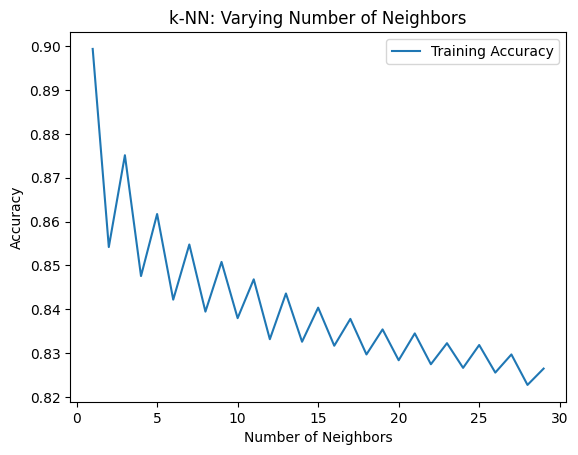

In [103]:
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    cv_scores = cross_val_score(knn, X, y, cv=5)
    
    #Compute accuracy on the training set
    train_accuracy[i] = np.mean(cv_scores)

    #Compute accuracy on the testing set
    #test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
#plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [104]:
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 40)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [105]:
knn_gscv.best_params_

{'n_neighbors': 1}

In [106]:
knn_gscv.best_score_

0.8993953011668243

In [72]:
oversample = RandomOverSampler(sampling_strategy="minority")

In [73]:
X_over, y_over = oversample.fit_resample(X, y)
X_over.head()

,Time,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,...,TimeSpent_minutes,buyDrinks,TotalSpent_RM,latitude,longitude,Num_of_Baskets,tempmax,tempmin,humidity,description
0,1.186818,1.281672,1.015622,0.007998,1.111704,1.509148,-0.855775,0.877381,-1.075186,-1.081452,...,-1.095669,-0.306655,-1.175289,-1.974354,0.219731,-1.24844,-0.729131,1.755352,0.320483,-1.616516
1,1.186818,-1.356417,1.015622,1.238486,-0.899520,-0.543765,-0.855775,-0.652490,-1.075186,1.265385,...,-1.165587,0.873818,1.620044,-1.844641,0.072282,1.25697,-0.729131,1.755352,0.320483,-1.616516
2,1.186818,1.281672,-0.984618,0.007998,-0.899520,-0.543765,-0.855775,-1.264439,-1.075186,0.972030,...,-1.235504,-0.306655,-0.243511,-1.678802,1.008022,-1.24844,-0.729131,1.755352,0.320483,-1.616516
3,1.330305,0.402309,1.015622,1.238486,-0.899520,-0.543765,-0.855775,-1.570413,-1.075186,-1.374806,...,-1.585093,-0.306655,0.455322,-1.495611,0.011978,-1.24844,-0.729131,1.755352,0.320483,-1.616516
4,1.330305,0.402309,1.015622,0.007998,-0.899520,-0.543765,-0.855775,-1.264439,-1.075186,-1.081452,...,-1.445258,-0.896892,-0.243511,-2.086209,0.252582,1.25697,-0.729131,1.755352,0.320483,-1.616516


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.3, random_state=1)

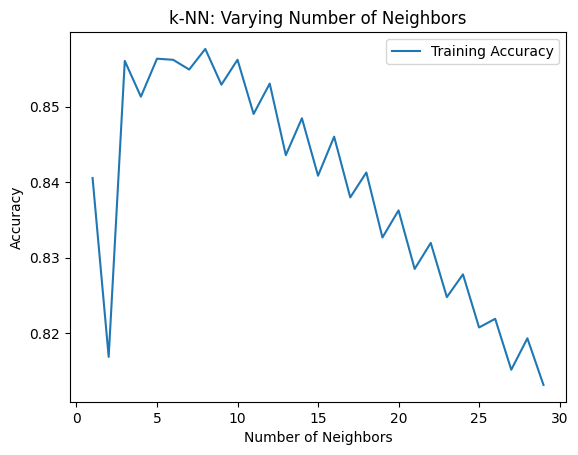

In [84]:
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    cv_scores = cross_val_score(knn, X_over, y_over, cv=5)
    
    #Compute accuracy on the training set
    train_accuracy[i] = np.mean(cv_scores)

    #Compute accuracy on the testing set
    #test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
#plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [78]:
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 40)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_over, y_over)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [79]:
knn_gscv.best_params_

{'n_neighbors': 8}

In [80]:
knn_gscv.best_score_

0.8576390870111987

In [82]:
undersample = RandomUnderSampler(sampling_strategy="majority")

In [83]:
X_under, y_under = undersample.fit_resample(X, y)
X_under.head()

,Time,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,...,TimeSpent_minutes,buyDrinks,TotalSpent_RM,latitude,longitude,Num_of_Baskets,tempmax,tempmin,humidity,description
0,1.186818,1.281672,1.015622,0.007998,1.111704,1.509148,-0.855775,0.877381,-1.075186,-1.081452,...,-1.095669,-0.306655,-1.175289,-1.974354,0.219731,-1.24844,-0.729131,1.755352,0.320483,-1.616516
1,1.186818,-1.356417,1.015622,1.238486,-0.899520,-0.543765,-0.855775,-0.652490,-1.075186,1.265385,...,-1.165587,0.873818,1.620044,-1.844641,0.072282,1.25697,-0.729131,1.755352,0.320483,-1.616516
2,1.186818,1.281672,-0.984618,0.007998,-0.899520,-0.543765,-0.855775,-1.264439,-1.075186,0.972030,...,-1.235504,-0.306655,-0.243511,-1.678802,1.008022,-1.24844,-0.729131,1.755352,0.320483,-1.616516
3,1.330305,0.402309,1.015622,1.238486,-0.899520,-0.543765,-0.855775,-1.570413,-1.075186,-1.374806,...,-1.585093,-0.306655,0.455322,-1.495611,0.011978,-1.24844,-0.729131,1.755352,0.320483,-1.616516
4,1.330305,0.402309,1.015622,0.007998,-0.899520,-0.543765,-0.855775,-1.264439,-1.075186,-1.081452,...,-1.445258,-0.896892,-0.243511,-2.086209,0.252582,1.25697,-0.729131,1.755352,0.320483,-1.616516


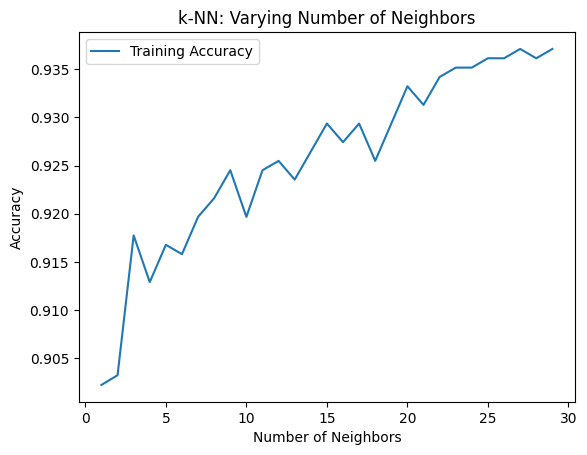

In [85]:
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    cv_scores = cross_val_score(knn, X_under, y_under, cv=5)
    
    #Compute accuracy on the training set
    train_accuracy[i] = np.mean(cv_scores)

    #Compute accuracy on the testing set
    #test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
#plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [87]:
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 40)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_under, y_under)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [88]:
knn_gscv.best_params_

{'n_neighbors': 31}

In [89]:
knn_gscv.best_score_

0.9390319403405094